6 classes:
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


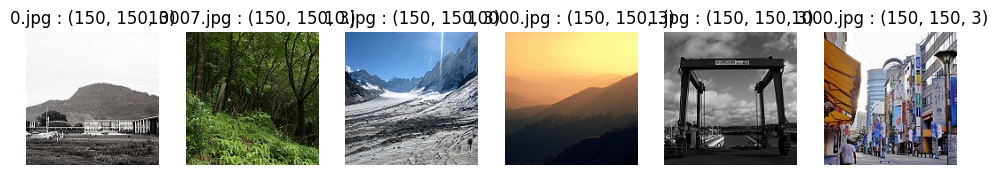

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = 'data/archive/seg_train/seg_train/'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

In [2]:
#check data numbers for each catalog
for i in os.listdir(data_path):
    print(f"{i} have {len(os.listdir(os.path.join(data_path, i)))} images")

buildings have 2191 images
forest have 2271 images
glacier have 2404 images
mountain have 2512 images
sea have 2274 images
street have 2382 images


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (200,200)
batch_size = 11
tf.random.set_seed(0)

datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.3)

train_gen = datagen.flow_from_directory(data_path,
                                         target_size = img_size,
                                         batch_size = batch_size,
                                         class_mode = 'categorical',
                                         subset = 'training')

test_gen = datagen.flow_from_directory(data_path,
                                        target_size = img_size,
                                        batch_size = batch_size,
                                        class_mode = 'categorical', 
                                        subset = 'validation')

Found 9826 images belonging to 6 classes.
Found 4208 images belonging to 6 classes.


In [4]:
class_name = list(train_gen.class_indices.keys())
class_name

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
from tensorflow.keras.applications.resnet import ResNet50
## include_top == False means model without output layer
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (200,200,3))
#print(base_model.summary())

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [9]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

for layer in base_model.layers:
    layer.trainable = False
    
x = base_model.output
x = Flatten()(x)
output_layer = Dense(6, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = output_layer)

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 206, 206, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 100, 100, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 100, 100, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 100, 100, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 102, 102, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 50, 50, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 50, 50, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 50, 50, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,189,830 (92.28 MB)

 Trainable params: 602,118 (2.30 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
num_epochs = 6
history = model.fit(train_gen,
            steps_per_epoch = train_gen.samples//batch_size,
            validation_data = test_gen, 
            validation_steps = test_gen.samples//batch_size,
            epochs = num_epochs)

Epoch 1/6


C:\Users\Computer\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


893/893 ━━━━━━━━━━━━━━━━━━━━ 2120s 2s/step - acc: 0.4100 - loss: 3.3449 - val_acc: 0.5283 - val_loss: 1.9844
Epoch 2/6
  1/893 ━━━━━━━━━━━━━━━━━━━━ 20:04 1s/step - acc: 0.4545 - loss: 1.3833

C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


893/893 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4545 - loss: 1.3833 - val_acc: 0.5000 - val_loss: 1.2533
Epoch 3/6
893/893 ━━━━━━━━━━━━━━━━━━━━ 2149s 2s/step - acc: 0.5656 - loss: 2.4014 - val_acc: 0.5286 - val_loss: 3.9152
Epoch 4/6
893/893 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7273 - loss: 1.3461 - val_acc: 0.8333 - val_loss: 2.4161
Epoch 5/6
893/893 ━━━━━━━━━━━━━━━━━━━━ 1853s 2s/step - acc: 0.6096 - loss: 2.2477 - val_acc: 0.5671 - val_loss: 2.5522
Epoch 6/6
893/893 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - acc: 0.8182 - loss: 3.4183 - val_acc: 0.5000 - val_loss: 4.8249


In [11]:
modelFileName = 'models/safari1.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/safari1.h5


## Use the trained model



In [15]:
# Function to predict the class of an image
def predict_image(classifier, image):
    import numpy
    
    # Default value
    index = 0
    
    # !!Add your code here to predict an image class from your model!!
    ## Have to remember model always assume you input as batch, must add new axis if only has one data!!!!!
    ## and remember to ensure the datatype and normalize (because generator load data as float and have normalize)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = image.astype('float32')
    image /= 255
    index = np.argmax(classifier.predict(image))
    # Return the predicted index
    return index


# Load your model
model = tf.keras.models.load_model('models/safari1.h5')

# The images are in the data/shapes folder
test_data_path = 'data/archive/seg_test/seg_test/'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, img)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Computer\\Documents\\DeepLearning\\data\\archive\\seg_test\\seg_test\\buildings'

<Figure size 800x1200 with 0 Axes>